In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable


from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 100

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = points0 = points1 = points2 = []
    
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]

            line = np.array(line)


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()

year1 = year2 = year3 = []
    


In [6]:
-

In [7]:
year1 = []
year2 = []
year3 = []

for file in dirs:
    month = get_pts(file)
    year1 += month [0::3]
    year2 += month [1::3]
    year3 += month [2::3]
    


start 20160101_20160131_427d:  2017-04-15 22:28:30.984659
time:  0:03:36.787499
start 20160201_20160229_401d:  2017-04-15 22:32:07.772541
time:  0:03:09.204756
start 20160301_20160331_355d:  2017-04-15 22:35:16.977563
time:  0:02:58.424291
start 20160401_20160430_325d:  2017-04-15 22:38:15.402248
time:  0:02:38.239634
start 20160501_20160531_294d:  2017-04-15 22:40:53.642165
time:  0:02:28.009689
start 20160601_20160630_264d:  2017-04-15 22:43:21.652316
time:  0:02:09.242322
start 20160701_20160731_252d:  2017-04-15 22:45:30.895501
time:  0:02:07.902746
start 20160801_20160831_217d:  2017-04-15 22:47:38.799156
time:  0:01:49.588003
start 20160901_20160930_172d:  2017-04-15 22:49:28.388008
time:  0:01:23.271898
start 20161001_20161031_141d:  2017-04-15 22:50:51.660821
time:  0:01:11.586507
start 20161101_20161130_111d:  2017-04-15 22:52:03.248426
time:  0:00:53.864688
start 20161201_20161231_95d:  2017-04-15 22:52:57.114086
time:  0:00:47.262191


start:  2017-04-15 22:53:44.401225
time:  0:00:10.994496
plot ok


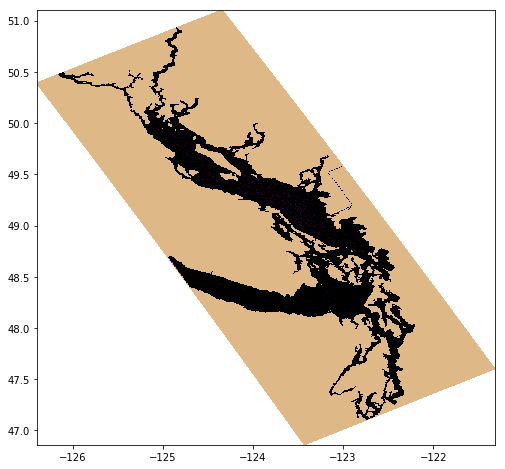

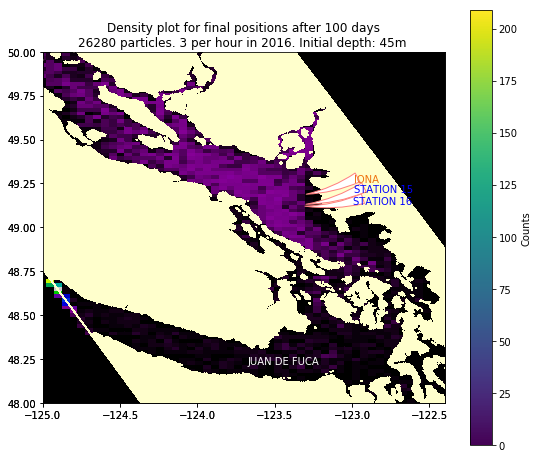

In [8]:
plt.clf()
points = np.array(year1) #convert to np.array
title = ("Density plot for final positions after {} days\n" 
"26280 particles. 3 per hour in 2016. Initial depth: 45m ".format(nday))

plot (points, title)

start:  2017-04-15 22:53:56.412961
time:  0:00:10.852055
plot ok


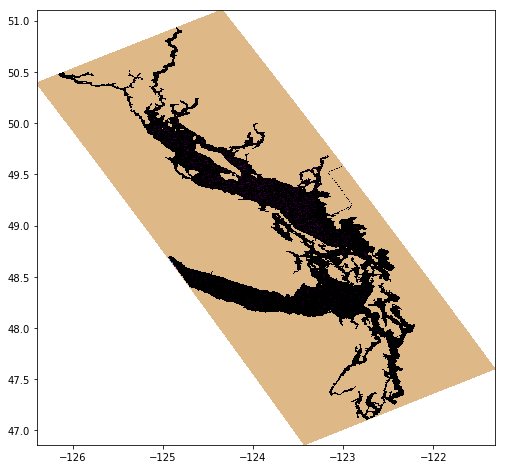

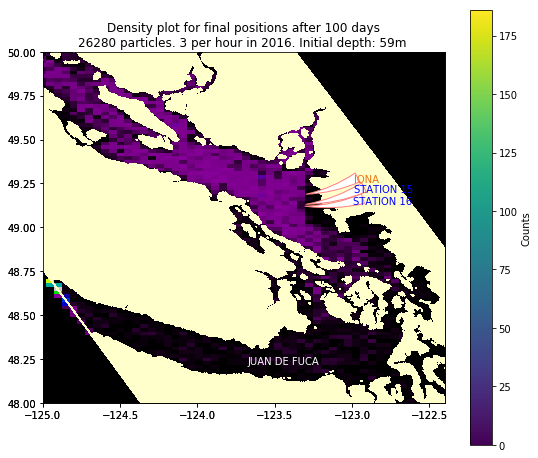

In [9]:
plt.clf()


points = np.array(year2) #back to original name. convert to np.array

title = ("Density plot for final positions after {} days\n" 
"26280 particles. 3 per hour in 2016. Initial depth: 59m ".format(nday))

plot (points, title)

start:  2017-04-15 22:54:08.251514
time:  0:00:11.078569
plot ok


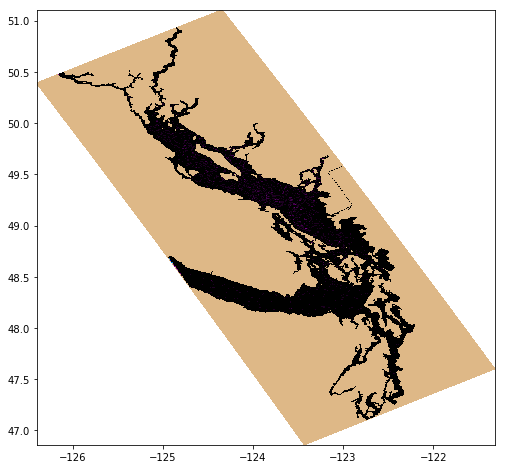

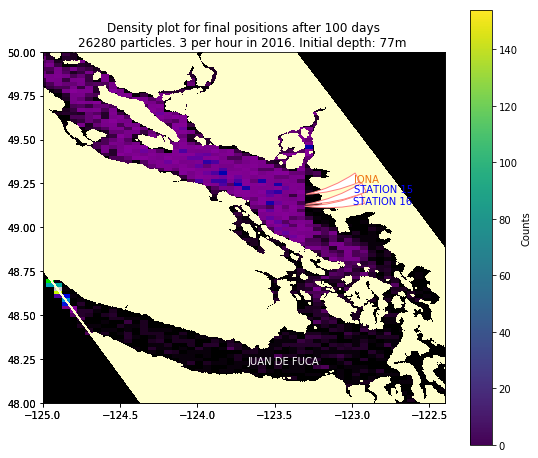

In [10]:
plt.clf()

points = np.array(year3) #back to original name. convert to np.array

title = ("Density plot for final positions after {} days\n" 
"26280 particles. 3 per hour in 2016. Initial depth: 77m ".format(nday))

plot (points, title)